In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
edu_df = education_df.copy()

In [4]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
edu_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [48]:
edu_df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [5]:
edu_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [21]:
gender_edu = edu_df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

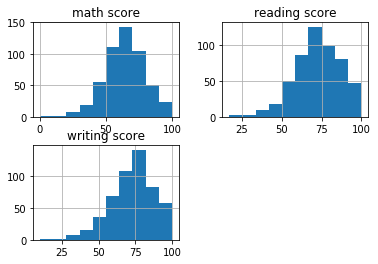

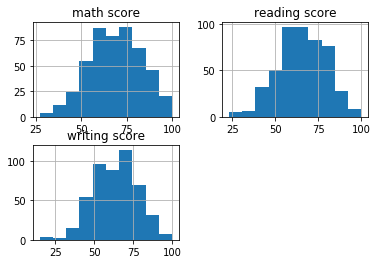

In [30]:
gender_edu = edu_df.groupby("gender")
gender_edu.hist()
plt.show()

In [27]:
ttest_ind(edu_df[edu_df.gender == "female"][["math score", "reading score", "writing score"]],
          edu_df[edu_df.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

Grouped by parental level of education

In [31]:
edu_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


Grouped by parental ethnicities

In [33]:
edu_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [42]:
edu_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [52]:
ttest_ind(edu_df[edu_df["lunch"] == "standard"][["math score", "reading score", "writing score"]],
          edu_df[edu_df["lunch"] == "free/reduced"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Does the test preparation course seem to have an effect on the exam performances?

In [35]:
edu_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [41]:
ttest_ind(edu_df[edu_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          edu_df[edu_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

There is a significant advantage to finishing the test preparation course across the board. 

Which 2 exam scores are most correlated with each other?

In [34]:
edu_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Writing and reading score are the ones that are most correlated with each other. 
Which makes sense because in studying them they are the ones that are most correlated. 